In [1]:
import glob
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = defaultdict(list)
n = 0
for path in sorted(glob.glob("../../1_NanoNASCseq/results/consensus/consensus_accuracy/20220719_K562R3/*/summary.tsv")):
    d = pd.read_csv(path, sep="\t", header=0, index_col=0)
    if len(d) >= 5000:
        n += 1
        for size, accuracy in d[["Size", "Accuracy"]].values:
            data[size].append(accuracy)
print(n)

58


1	468869	16.622606427527423	0.9782359679266897
2	138477	19.84527313343791	0.9896373056994818
3	75054	24.95544337546443	0.9968051118210862
4	51421	27.626785637274722	0.9982728842832471
5	38405	29.242792860618835	0.9988095238095238
6	29901	29.72202838379076	0.9989339019189766
7	24521	29.885589568786678	0.9989733059548256
8	20607	30.094508957987554	0.9990215264187868
9	17493	30.14100321519556	0.999031945788964
10	237008	30.523732542352406	0.9991136061263187


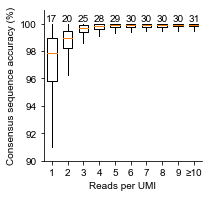

In [6]:
plt.figure(figsize=(3, 2.8))
xs = np.arange(1, 11)
xticks = list(map(str, xs))
xticks[-1] = "≥%s" % xticks[-1]
w = 0.6
for x in xs:
    ys = np.array(data[x])
    v = np.median(ys)
    q = -10 * np.log10(1 - v)
    print(x, len(ys), q, np.median(ys), sep="\t")
    plt.boxplot([ys * 100], positions=[x], widths=w, showfliers=False, showcaps=False)
    plt.text(x, 100.2, str(round(q)), ha="center")
plt.xlabel("Reads per UMI")
plt.ylabel("Consensus sequence accuracy (%)")
plt.ylim(90, 101)
plt.xlim(0.5, 10.5)
plt.xticks(xs, xticks)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.savefig("figures/consensus_accuracy.pdf", dpi=300)